In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage.io import imread, imshow, imsave
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
import cv2
from skimage.measure.entropy import shannon_entropy
from PIL import Image
from skimage import io
from scipy.stats import skew

* **For Apple the factor is 0.3**
* **For Banana its 0.25**
* **For Tomato its 0.25**

In [2]:
def entropy_mask_viz(image,factor):
    image_gray = rgb2gray(image)
    entropy_image = entropy(image_gray, disk(4),)
    scaled_entropy = entropy_image / entropy_image.max()
    f_size = 24
    threshold = scaled_entropy > factor
    image_a = np.dstack([image[:,:,0]*threshold,
                            image[:,:,1]*threshold,
                            image[:,:,2]*threshold])
    return image_a

In [3]:
def test(image,fruit):
    if fruit=='apple':
        factor = 0.3
    elif fruit=='banana':
        factor = 0.25
    else:
        factor = 0.25
    img = entropy_mask_viz(image,factor)
    img1 = img[..., :3]
    x = np.array(img)
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    img = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
#             Statistical Features
    R, G, B = np.dsplit(img1, img1.shape[-1])
    mean_R=(np.mean(R))
    mean_G=(np.mean(G))
    mean_B=(np.mean(B))
    std_R=(np.std(R))
    std_G=(np.std(G))
    std_B=(np.std(B))
    skewness_R=(skew(R.flatten()))
    skewness_G=(skew(G.flatten()))
    skewness_B=(skew(B.flatten()))
#             Texture Feature
    glcm_0 = greycomatrix(img, [5], [0], levels=256, normed=True, symmetric=True)
    glcm_45 = greycomatrix(img, [5], [np.pi/4], levels=256, normed=True, symmetric=True)
    glcm_90 = greycomatrix(img, [5], [np.pi/2], levels=256, normed=True, symmetric=True)
    glcm_135 = greycomatrix(img, [5], [3*np.pi/4], levels=256, normed=True, symmetric=True)
#             Contrast
    contrast_0=(greycoprops(glcm_0, 'contrast')[0][0])
    contrast_45=(greycoprops(glcm_45, 'contrast')[0][0])
    contrast_90=(greycoprops(glcm_90, 'contrast')[0][0])
    contrast_135=(greycoprops(glcm_135, 'contrast')[0][0])
#             Correlation
    correlation_0=(greycoprops(glcm_0, 'correlation')[0][0])
    correlation_45=(greycoprops(glcm_45, 'correlation')[0][0])
    correlation_90=(greycoprops(glcm_90, 'correlation')[0][0])
    correlation_135=(greycoprops(glcm_135, 'correlation')[0][0])
#             Energy
    energy_0=(greycoprops(glcm_0, 'energy')[0][0])
    energy_45=(greycoprops(glcm_45, 'energy')[0][0])
    energy_90=(greycoprops(glcm_90, 'energy')[0][0])
    energy_135=(greycoprops(glcm_135, 'energy')[0][0])
#             Homogeneity
    homogeneity_0=(greycoprops(glcm_0, 'homogeneity')[0][0])
    homogeneity_45=(greycoprops(glcm_45, 'homogeneity')[0][0])
    homogeneity_90=(greycoprops(glcm_90, 'homogeneity')[0][0])
    homogeneity_135=(greycoprops(glcm_135, 'homogeneity')[0][0])
    d = {'Mean_R':mean_R,'Mean_G':mean_G,'Mean_B':mean_B,'Std_R':std_R,'Std_G':std_G,
         'Std_B':std_B,'Skew_R':skewness_R,'Skew_G':skewness_G,'Skew_B':skewness_B,
         'Contrast_0':contrast_0,'Correlation_0':correlation_0,'Energy_0':energy_0,'Homogeneity_0':homogeneity_0,
        'Contrast_45':contrast_45,'Correlation_45':correlation_45,'Energy_45':energy_45,'Homogeneity_45':homogeneity_45,
        'Contrast_90':contrast_90,'Correlation_90':correlation_90,'Energy_90':energy_90,'Homogeneity_90':homogeneity_90,
        'Contrast_135':contrast_135,'Correlation_135':correlation_135,'Energy_135':energy_135,'Homogeneity_135':homogeneity_135}
    return img, d

### Apples

In [4]:
img = imread('TestImages/Apples/fresh (1).jpg')
mask, d = test(img,'apple')

C:\Users\JAINAM\AppData\Local\Temp\ipykernel_10208\2133938514.py:8: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  img = entropy_mask_viz(image,factor)


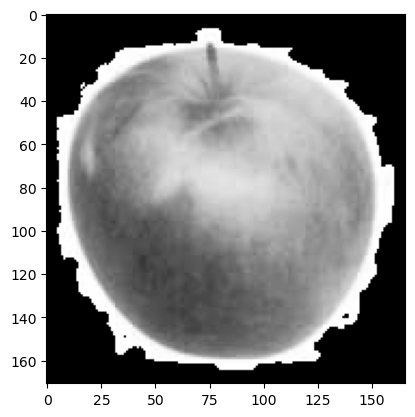

In [5]:
plt.imshow(mask,cmap='gray')

In [6]:
d

{'Mean_R': 155.64891143521453,
 'Mean_G': 114.17903191714225,
 'Mean_B': 87.64648065948002,
 'Std_R': 109.35210016155588,
 'Std_G': 94.79052954988825,
 'Std_B': 77.2459845857591,
 'Skew_R': -0.682399203177701,
 'Skew_G': 0.033713783287839444,
 'Skew_B': 0.5199368187228148,
 'Contrast_0': 4263.302168464641,
 'Correlation_0': 0.7259985104468022,
 'Energy_0': 0.2761463197974835,
 'Homogeneity_0': 0.3450968565631797,
 'Contrast_45': 5093.590966215714,
 'Correlation_45': 0.6684712877765973,
 'Energy_45': 0.2572572274391213,
 'Homogeneity_45': 0.32219754584312427,
 'Contrast_90': 4116.487951807225,
 'Correlation_90': 0.7355976550380041,
 'Energy_90': 0.2767684401585613,
 'Homogeneity_90': 0.3457540949580762,
 'Contrast_135': 5367.766762770754,
 'Correlation_135': 0.650625891599792,
 'Energy_135': 0.2561033059006001,
 'Homogeneity_135': 0.3079449418121749}

In [7]:
dct = {k:[v] for k,v in d.items()}  # WORKAROUND
df = pd.DataFrame(dct)

In [8]:
df

,Mean_R,Mean_G,Mean_B,Std_R,Std_G,Std_B,Skew_R,Skew_G,Skew_B,Contrast_0,...,Energy_45,Homogeneity_45,Contrast_90,Correlation_90,Energy_90,Homogeneity_90,Contrast_135,Correlation_135,Energy_135,Homogeneity_135
0,155.648911,114.179032,87.646481,109.3521,94.79053,77.245985,-0.682399,0.033714,0.519937,4263.302168,...,0.257257,0.322198,4116.487952,0.735598,0.276768,0.345754,5367.766763,0.650626,0.256103,0.307945


In [9]:
import joblib

In [10]:
sc1 = joblib.load('Models/AppleScaler_1.save')
sc2 = joblib.load('Models/AppleScaler_2.save')

In [11]:
X1 = sc1.transform(df)
X2 = sc2.transform(df)

In [12]:
import joblib 
model1 = joblib.load('Models/applemodel_1.joblib')
model2 = joblib.load('Models/applemodel_2.joblib')

In [13]:
pred1 = model1.predict(X1)
pred1

array([1], dtype=int64)

In [14]:
if pred1[0] ==0:
    print('Fresh - 0% Rotten')
else:
    pred2 = model2.predict(X2)
#     print(pred2)
    if pred2[0] == 1:
        print("25% Rotten")
    elif pred2[0]==2:
        print('50% Rotten')
    elif pred2[0]==3:
        print('75% Rotten')
    else:
        print('100% Rotten')

50% Rotten


In [15]:
import os

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
for i in os.listdir('TestImages/Apples'):
    img = imread(f'TestImages/Apples/{i}')
    print(i)
    mask, d = test(img,'apple')
    dct = {k:[v] for k,v in d.items()}  # WORKAROUND
    df = pd.DataFrame(dct)
    X1 = sc1.transform(df)
    X2 = sc2.transform(df)
    if pred1[0] ==0:
        print('Fresh - 0% Rotten')
    else:
        pred2 = model2.predict(X2)
    #     print(pred2)
        if pred2[0] == 1:
            print("25% Rotten")
        elif pred2[0]==2:
            print('50% Rotten')
        elif pred2[0]==3:
            print('75% Rotten')
        else:
            print('100% Rotten')
    print("--------------------------")

25%Rotten (1).png
75% Rotten
--------------------------
25%Rotten (2).png
25% Rotten
--------------------------
25%Rotten (3).png
25% Rotten
--------------------------
50%Rotten (2).png
50% Rotten
--------------------------
50%Rotten (3).png
50% Rotten
--------------------------
50%Rotten.png
75% Rotten
--------------------------
apple_10.jpg
25% Rotten
--------------------------
apple_8.jpg
50% Rotten
--------------------------
fresh (1).jpg
50% Rotten
--------------------------
fresh (2).jpg
75% Rotten
--------------------------
fresh.jpg
75% Rotten
--------------------------
freshapple.jpg
25% Rotten
--------------------------
midapple.png
50% Rotten
--------------------------
rottenapple.jpeg
25% Rotten
--------------------------


### Banana

In [18]:
img = imread('TestImages/Bananas/frame60.jpg')
mask, d = test(img,'banana')

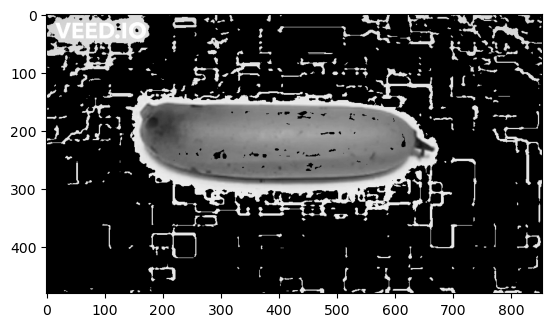

In [19]:
plt.imshow(mask,cmap='gray')

In [20]:
dct = {k:[v] for k,v in d.items()}  # WORKAROUND
df = pd.DataFrame(dct)

In [21]:
df

,Mean_R,Mean_G,Mean_B,Std_R,Std_G,Std_B,Skew_R,Skew_G,Skew_B,Contrast_0,...,Energy_45,Homogeneity_45,Contrast_90,Correlation_90,Energy_90,Homogeneity_90,Contrast_135,Correlation_135,Energy_135,Homogeneity_135
0,46.087158,54.090752,35.390025,79.075978,90.433339,79.914858,1.305053,1.15062,2.061822,4917.22883,...,0.660497,0.704487,5937.12638,0.566756,0.668936,0.719503,6810.675902,0.503817,0.659965,0.703835


In [22]:
sc = joblib.load('Models/BananaScaler.save')

In [23]:
X = sc.transform(df)

In [24]:
import joblib 
model1 = joblib.load('Models/bananamodel.joblib')

In [25]:
pred = model1.predict(X)
pred

array([0], dtype=int64)

In [26]:
if pred[0]==0:
    print('0% Rotten')
elif pred[0]==1:
    print('35% Rotten')
elif pred[0]==2:
    print('70% Rotten')
else:
    print('100% Rotten')

0% Rotten


### Tomatoes